<a href="https://colab.research.google.com/github/wenbos3109/pytorchDL/blob/main/start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np

In [2]:
torch.cuda.is_available()

True

In [3]:
data = torch.tensor([[1, 2], [3, 4]])

In [4]:
data.numpy()

array([[1, 2],
       [3, 4]])

In [6]:
x = torch.ones_like(data)
x

tensor([[1, 1],
        [1, 1]])

In [7]:
print(x.shape, x.requires_grad, x.dtype)

torch.Size([2, 2]) False torch.int64


In [8]:
x.reshape(-1)

tensor([1, 1, 1, 1])

In [9]:
x.view(-1)

tensor([1, 1, 1, 1])

In [11]:
x.mul(x)

tensor([[1, 1],
        [1, 1]])

In [82]:
import math
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
      print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2079.589111328125
199 1474.0787353515625
299 1045.628173828125
399 742.4638671875
499 527.9478149414062
599 376.1571044921875
699 268.75030517578125
799 192.74893188476562
899 138.969970703125
999 100.9156723022461
1099 73.98798370361328
1199 54.93352127075195
1299 41.45024490356445
1399 31.909210205078125
1499 25.157739639282227
1599 20.38025665283203
1699 16.99958038330078
1799 14.607305526733398
1899 12.914473533630371
1999 11.716568946838379
Result: y = -0.05698472633957863 + 0.8557221293449402 x + 0.00983081292361021 x^2 + -0.09318549185991287 x^3


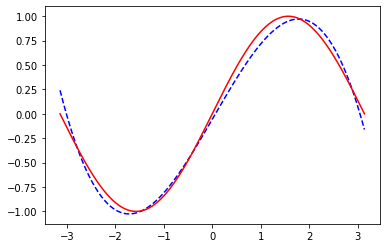

In [83]:
import matplotlib.pyplot as plt

y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_pred, 'b--')
plt.plot(x, y, 'r-')

Result: y = -0.00440260162577033 + 0.8346083760261536 x + 0.0007595233619213104 x^2 + -0.09018223732709885 x^3
<class 'torch.Tensor'> <class 'torch.Tensor'> torch.Size([2000]) torch.Size([2000])


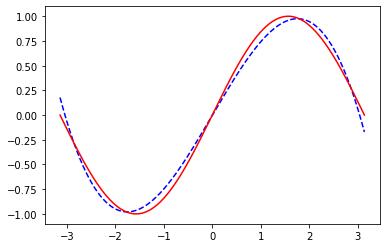

In [105]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 199:
      print(t, loss)
    loss.backward()
    with torch.no_grad():
      a -= learning_rate * a.grad
      b -= learning_rate * b.grad
      c -= learning_rate * c.grad
      d -= learning_rate * d.grad

      # Manually zero the gradients after updating weights
      a.grad = None
      b.grad = None
      c.grad = None
      d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
y_pred = a + b * x + c * x ** 2 + d * x ** 3
print(type(x), type(y_pred), x.shape, y_pred.shape)
plt.plot(x, y_pred.detach().numpy(), 'b--')
plt.plot(x, y, 'r-')

# Auto grad

$$Q=3a^3-b^2$$

\begin{equation}
\begin{array}{l}
\frac{\partial Q}{\partial a}=9 a^{2} \\
\frac{\partial Q}{\partial b}=-2 b
\end{array}
\end{equation}



In [12]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
q = 3* a **3 - b ** 2

In [13]:
q.backward(torch.tensor([1., 1.]))

In [15]:
print(a.grad == 9 * a ** 2, b.grad == -2 * b)

tensor([True, True]) tensor([True, True])



### Vector calculus 
The $y$ corresponds to this $x$
\begin{align*}
J&=\left(\begin{array}{ccc}
\frac{\partial \mathbf{y}}{\partial x_{1}} & \ldots & \frac{\partial \mathbf{y}}{\partial x_{n}}
\end{array}\right)=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\\
l&=g(\vec{y})=\left(\begin{array}{ccc}
\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}
\end{array}\right)^{T}\\
J^{T} \cdot \vec{v}&=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\left(\begin{array}{c}
\frac{\partial l}{\partial y_{1}} \\
\vdots \\
\frac{\partial l}{\partial y_{m}}
\end{array}\right)=\left(\begin{array}{c}
\frac{\partial l}{\partial x_{1}} \\
\vdots \\
\frac{\partial l}{\partial x_{n}}
\end{array}\right)
\end{align*}


In [16]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

In [17]:
a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


### With examples

In [129]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [130]:
a = torch.tensor([1,2,3])
a.pow(torch.tensor([1, 2, 3]))

tensor([ 1,  4, 27])

In [131]:
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
print(xx)

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])


In [132]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

In [138]:
for param in model.parameters():
  print(param.shape)

torch.Size([1, 3])
torch.Size([1])


In [133]:
t = torch.tensor([[[1, 2],
                    [3, 4]],
                    [[5, 6],
                    [7, 8]]])
print(t.shape)

torch.Size([2, 2, 2])


In [134]:
t_flat = nn.Flatten(start_dim=1, end_dim=-1)(t)
print(t_flat, t_flat.shape)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]]) torch.Size([2, 4])


In [135]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [136]:
learning_rate = 1e-6

In [142]:
for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 199 == 0:
        print(t, loss.item())
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

linear_layer = model[0]
# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

0 9.353668212890625
199 9.031881332397461
398 8.856672286987305
597 8.828039169311523
796 8.945984840393066
995 9.210506439208984
1194 9.621606826782227
1393 10.179285049438477
1592 10.883552551269531
1791 11.734416007995605
1990 12.73186206817627
Result: y = -0.04857415705919266 + 0.8988654017448425 x + 0.008379936218261719 x^2 + -0.09931813925504684 x^3


### With optim

In [144]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
print(xx.shape)

torch.Size([2000, 3])


In [145]:

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = nn.MSELoss(reduction='sum')
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

In [146]:
for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 199 == 0:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

linear_layer = model[0]
# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

0 102821.90625
199 22797.22265625
398 4455.50390625
597 347.97247314453125
796 159.21556091308594
995 111.15137481689453
1194 52.173892974853516
1393 16.764934539794922
1592 9.023740768432617
1791 8.832648277282715
1990 9.103145599365234
Result: y = 0.0005029881722293794 + 0.8571298122406006 x + 0.0005030100583098829 x^2 + -0.09291684627532959 x^3


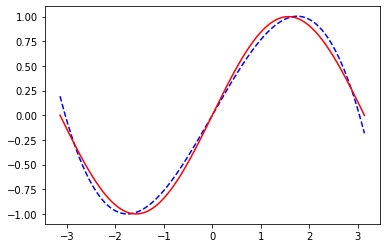

In [147]:

plt.plot(x, model(xx).detach().numpy(), 'b--')
plt.plot(x, y, 'r-')